## Statistical Analysis on voter data from the Db.sqlite3 DATABASE

In [44]:
!pip install faker
!pip install pandas
!pip install openpyxl
!pip install matplotlib
!pip install numpy
!pip install Jinja2

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 KB 599.4 kB/s eta 0:00:00a 0:00:01


### Connect to the SQLITE database

In [64]:
# Store the ethnicities values before populating the database with users:
db_path = 'db.sqlite3'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()



### Ethnicity distribution

  Ethnicity  Vote Count
0     black         230
1  coloured         275
2    indian         243
3     white         252


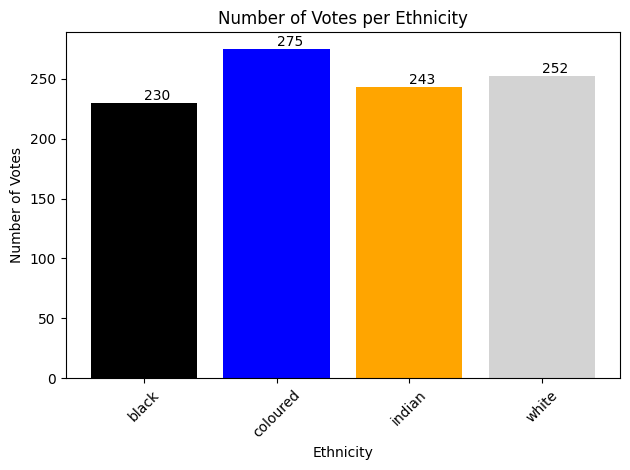

In [56]:
# Displaying via 

query_fetch_votes = """
    SELECT ethnicity.name, COUNT(*) as vote_count
    FROM voteapp_voter
    INNER JOIN voteapp_ethnicity AS ethnicity
    ON voteapp_voter.ethnicity_id = ethnicity.id
    GROUP BY ethnicity.name;
"""
cursor.execute(query_fetch_votes)
votes_per_ethnicity = cursor.fetchall()


# Create a DataFrame
df_votes_per_ethnicity = pd.DataFrame(votes_per_ethnicity, columns=['Ethnicity', 'Vote Count'])
print(df_votes_per_ethnicity)

# Separate ethnicity names and vote counts
ethnicities = [item[0] for item in votes_per_ethnicity]
vote_counts = [item[1] for item in votes_per_ethnicity]

# Define different colors for each category
colors = ['black', 'blue', 'orange', 'lightgrey']

# Plot histogram
fig, ax = plt.subplots()
bars = ax.bar(ethnicities, vote_counts, color=colors)
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Number of Votes')
ax.set_title('Number of Votes per Ethnicity')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add labels to each bar for clarity
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom')  # va: vertical alignment

# Show the plot
plt.tight_layout()
plt.show()




### Displaying the voting ethnicity using dataframe styling

In [50]:
# Ethnicity distibution in table format:

# Create a DataFrame
df_votes_per_ethnicity = pd.DataFrame(votes_per_ethnicity, columns=['Ethnicity', 'Vote Count'])

#df_votes_per_ethnicity = pd.DataFrame(votes_per_ethnicity, columns=['Ethnicity', 'Vote Count'])

# Apply styling
styled_df = df_votes_per_ethnicity.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('font-size', '18px'), ('padding', '10px')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid #dddddd'), ('font-size', '16px'), ('padding', '10px')]
    }]
).set_properties(**{
    'background-color': '#ffffff',
    'color': 'black',
    'border-color': 'black',
    'font-size': '16px',
    'padding': '10px'
}).highlight_max(subset=['Vote Count'], color='lightgreen').highlight_min(subset=['Vote Count'], color='lightcoral')

styled_df

,Ethnicity,Vote Count
0,black,230
1,coloured,275
2,indian,243
3,white,252


In [49]:
# fetch total number of registered voters:
query_total_number_of_registered_voters = """
    SELECT COUNT(*) FROM voteapp_voter;
"""

cursor.execute(query_total_number_of_registered_voters)
result1 = cursor.fetchone()
if(result1):
    print(f"Total number of registered voters: {result1[0]}")

## Fetch number of voters who registered and voted:
query_total_of_voted = """ 
    SELECT COUNT(*) FROM voteapp_voter v 
    JOIN voteapp_vote vt on v.vote_id = vt.id
    WHERE vt.national IS NOT NULL
    AND vt.provincial IS NOT NULL
    AND vt.regional IS NOT NULL
"""

cursor.execute(query_total_of_voted)
result2 = cursor.fetchone()

if(result2):
    print(f"Total number of registered voters who voted {result2[0]}")

conn.commit()

Total number of registered voters: 1000
Total number of registered voters who voted 685


### Total number of registered voters VS Voters who actually voted

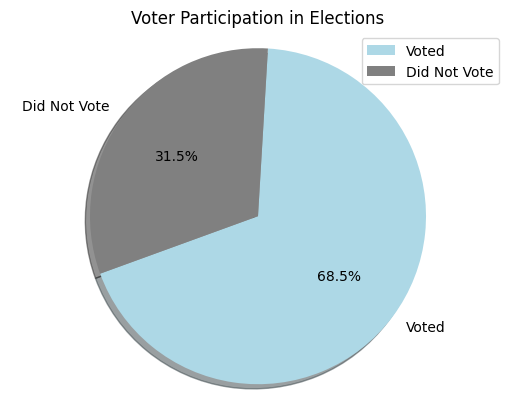

In [62]:
# plotting the above data:

# calculation
total_registered = result1[0]
total_voted = result2[0]
non_voted = total_registered - total_voted

percentage_voted = (total_voted/total_registered) * 100
percentage_non_voted = 100 - percentage_voted

# print(percentage_non_voted)

labels = ['Voted', 'Did Not Vote']
sizes = [percentage_voted, percentage_non_voted]
colors = ['lightblue', 'grey']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=200)
plt.legend(labels, loc="upper right")
plt.title("Voter Participation in Elections")
plt.axis('equal')
plt.show()


### Gender distribution

Query the database for the voter data and plot the gender voting distribution

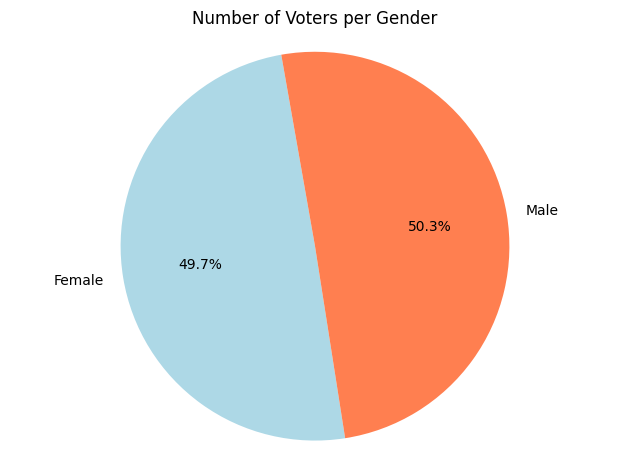

In [66]:

# Query to get the number of voters per gender
query = """
    SELECT gender, COUNT(*) as count
    FROM voteapp_voter
    GROUP BY gender;
"""
cursor.execute(query)
voters_per_gender = cursor.fetchall()

# Close the connection
# cursor.close()


# Separate gender names and counts
genders = [item[0] for item in voters_per_gender]
counts = [item[1] for item in voters_per_gender]

# Define colors for each gender
colors = ['coral', 'lightblue']

# Plot pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=genders, colors=colors, autopct='%1.1f%%', startangle=100)
ax.set_title('Number of Voters per Gender')

# Equal aspect ratio ensures the pie is drawn as a circle
ax.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()



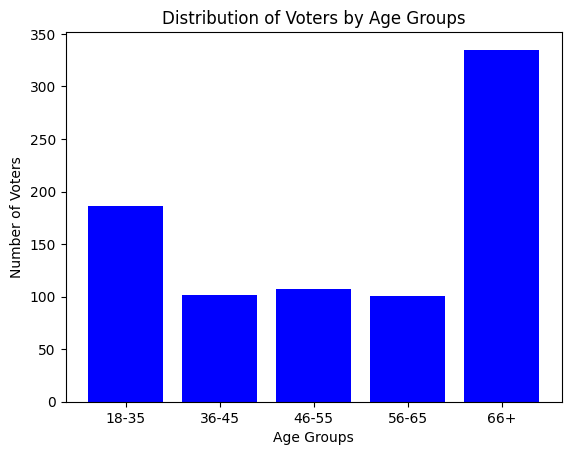

In [7]:
# Get age of users:

# Get birth year from ID number
def get_birth_year_from_id(idnumber):
    year_prefix = int(idnumber[:2])
    current_year = datetime.now().year % 100  # Get the last two digits of the current year
    century = 1900 if year_prefix > current_year else 2000
    return century + year_prefix

# Calculate age from birth year
def calculate_age(birth_year):
    current_year = datetime.now().year
    return current_year - birth_year

# Fetch all voters
query_fetch_voters = """
    SELECT firstname, lastname, idnumber FROM voteapp_voter;
"""
cursor.execute(query_fetch_voters)
voters = cursor.fetchall()

# Age groups initialization
age_groups = {
    '18-35': 0,
    '36-45': 0,
    '46-55': 0,
    '56-65': 0,
    '66+': 0
}

# Calculate ages and categorize into age groups
for voter in voters:
    firstname, lastname, idnumber = voter
    birth_year = get_birth_year_from_id(idnumber)
    age = calculate_age(birth_year)
    
    # Ignore users below 18 years old
    if age >= 18:
        if 18 <= age <= 35:
            age_groups['18-35'] += 1
        elif 36 <= age <= 45:
            age_groups['36-45'] += 1
        elif 46 <= age <= 55:
            age_groups['46-55'] += 1
        elif 56 <= age <= 65:
            age_groups['56-65'] += 1
        else:
            age_groups['66+'] += 1

# Plot histogram
fig, ax = plt.subplots()
age_group_labels = list(age_groups.keys())
age_group_counts = list(age_groups.values())

ax.bar(age_group_labels, age_group_counts, color='blue')
ax.set_xlabel('Age Groups')
ax.set_ylabel('Number of Voters')
ax.set_title('Distribution of Voters by Age Groups')

# Show the plot
plt.show()

In [8]:
# Close the database connection
conn.close()